<a href="https://colab.research.google.com/github/AdrianEspitiaUN/ML-projects/blob/main/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Exercise 1.2

Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is $+1$ if the message is considered spam.

- Can you think of some keywords that will end up with a large positive weight in the perceptron?

We can think of some words that occur repeatedly in spam mails, like free, winner, offer, prize, etc.

- How about keywords that will get a negative weight?

Some examples are: deadline, meeting, date, etc.

- What parameter in the perceptron directly affects how many border-line messages end up being classified as spam?

Since the bias moves the hyperplane keeping its orientation the same, the points near the hyperplane are greatly affected by this value.

#### Exercise 1.3
The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly.

- Show that $y(t)\vec{w}^{T}(t)\vec{x}(t)<0$.

Since $\vec{x}(t)$ is classified in the wrong class, the sign of $\vec{w}^{T}(t)\vec{x}(t)$ is the opposite to the sign of $y(t)$, therefore, $y(t)\vec{w}^{T}(t)\vec{x}(t)<0$ in every case.

- Show that $y(t)\vec{w}^{T}(t+1)\vec{x}(t)>y(t)\vec{w}^{T}(t)\vec{x}(t)$.

Since $\vec{w}(t+1)=\vec{w}(t)+y(t)\vec{x}(t)$, we have:

$y(t)\vec{w}^{T}(t+1)\vec{x}(t) = y(t)(\vec{w}(t)+y(t)\vec{x}(t))\vec{x}(t) = y(t)\vec{w}^{T}(t)\vec{x}(t)+y^2(t)||\vec{x}(t)||^2>y(t)\vec{w}^{T}(t)\vec{x}(t)$

- As far as classifying $x(t)$ is concerned, argue that the move from $\vec{w}(t)$ to $\vec{w}(t+1)$ is a move "in the right direction".

Since $y(t)\vec{w}^T\vec{x}(t)<0$ and $y(t)\vec{w}(t+1)\vec{x}(t)$, then the next step $\vec{w}(t+1)=\vec{w}(t)+y(t)\vec{x}(t)$ increases until it surpasses 0, in which case $\{x(t),y(t)\}$ won't be wrongly classified.


#### Exercise 1.10
1. (a) The $\mu$ for the three coins are all $0.5$ since the coins are fair.

In [ ]:
# Exercise 1.10 (a) 
total_coins = 1000
total_flips = 10
run_once(total_coins, total_flips, True)

Frequency of first coin: 0.5
Frequency of a random coin: id(83)-freq(0.3)
Frequency of the coin with minimum frequency: id(7)-freq(0.0)


(0.5, 0.3, 0.0)

(array([6.23941e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.76049e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 10 Patch objects>)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


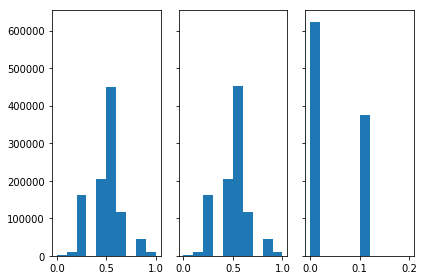

In [ ]:
# Exercise 1.10 (b) 
total_coins = 1000
total_flips = 10
total_runs = 1000000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

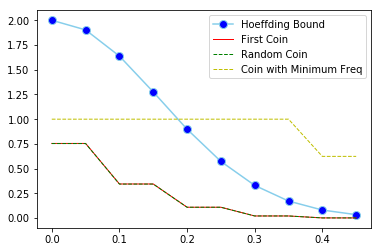

In [ ]:
# Exercise 1.10 (c)
eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

#### Exercise 1.10
1. (d) The Hoeffding bound applies to the first and random coins. However, the coin with the minimum frequency of heads does not satisfy the Hoeffding bound. This is because the first two coins were selected before conducting the experiment, whereas the last coin requires flipping all the coins first and using the data to determine which coin has the lowest frequency of heads. This violates the condition of the Hoeffding inequality, which states that the hypothesis $h$ must be fixed before drawing samples.

1. (e) When we select the coin with the minimum frequency of heads, it is like choosing a bin out of 1000 bins (our hypothesis space). However, we choose the bin after sampling the data, which is similar to the learning algorithm for the final hypothesis. On the other hand, the other two coins were chosen before the sampling, which means they were selected beforehand.

#### Exercise 1.11

1. (a) It is not possible for $S$ to generate a hypothesis that consistently performs better than random on points outside of $\mathcal{D}$. If $f$ has a value of 25 $+1$ on $\mathcal{D}$ but $-1$ on all other points in $\mathcal{X}$, $S$ will select the hypothesis $h_1$, which does not match $f$ at all outside of $\mathcal{D}$. On the other hand, a random function will have an equal distribution of $+1$ and $-1$, resulting in a 50/50 chance of matching $f$, which is better than the hypothesis produced by $S$.

1. (b) It is possible for $C$ to generate a better hypothesis than $S$. Refer to the example mentioned above.

1. (c) If every point in $\mathcal{D}$ has a value of 1, then $S$ will choose $h_1$ and $C$ will choose $h_2$. Thus, outside of $\mathcal{D}$, $h_1$ will have a 90% chance of matching $f$, while $h_2$ will only have a 10% chance. In this case, $S$ will always produce a better hypothesis than $C$.

1. (d) As observed in the previous problem, when $p \lt 0.5$, $C$ will generate a better hypothesis than $S$. Since $C$ always produces $h_2$, which matches $f$ better than $h_1$ when $p \lt 0.5$.

#### Exercise 1.12

The best outcome we can expect is situation (c):
* The unknown target function $f$ might be extremely complex, making it impossible for us to learn it accurately.
* If we are able to learn and generate a hypothesis $g$, the large dataset (4000 data points) increases the probability of $g$ matching $f$ according to the Hoeffding inequality. Additionally, the error on $g$ could be small due to the extensive data set.